#  Istogrammi e sogliature

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from skimage import draw as drw
from skimage import  exposure, img_as_float, img_as_ubyte 
from skimage import data, io, color
%matplotlib inline

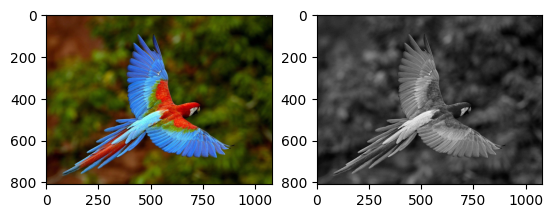

In [6]:
astro = io.imread('FESI/istogrammi/istogrammi/images/parrot_small.jpg')#data.astronaut() 
g_astro = img_as_ubyte(color.rgb2gray(astro))

plt.subplot(1,2,1)
plt.imshow(astro)

plt.subplot(1,2,2)
plt.imshow(g_astro,cmap='gray');

### Istogrammi

Una rappresentazione alternativa dell'immagine che mette in evidenza la distribuzione delle intensità perdendo informazione spaziale. <br> 

A partire dalla stessa immagine si possono costruire istogrammi diversi, cambiando il numero di bin (elementi dell'istogramma) o scegliendo di normalizzare l'istogramma (in questo modo lo possiamo trattare come una stima di probabilità).  

**For more info**: check the documentation of  `plt.hist` (from `matplotlib`)

Possiamo analizzare l'istogramma ottenuto per scegliere un'opportuna soglia da applicare all'immagine ad intensità luminosa per binarizzarla.

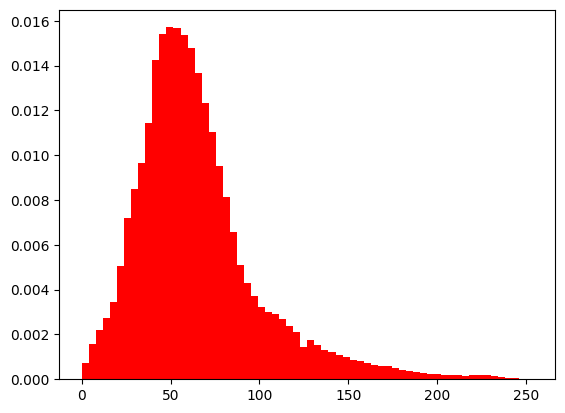

In [7]:
#density controls normalization (try out density False)
#bins the number of bins
plt.hist(g_astro.ravel(), bins=64, density=True, color='r');


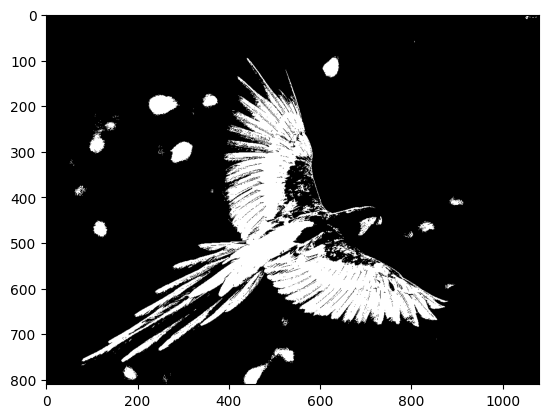

In [8]:
plt.imshow(g_astro>100,cmap='gray')

Diamo un'occhiata agli istogrammi dei campi di colore e estendiamo la sogliatura a (combinazioni di) campi di colore

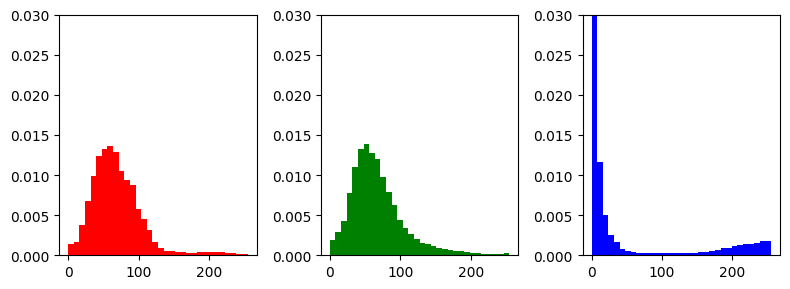

In [9]:
R = astro[:,:,0]
G = astro[:,:,1]
B = astro[:,:,2]

plt.figure(figsize=(8,3))

plt.subplot(1,3,1)
plt.hist(R.ravel(), bins=32, density=True, color='r'); #density controls normalization (try out density False)
plt.ylim([0,0.03])


plt.subplot(1,3,2)
plt.hist(G.ravel(), bins=32, density=True, color='g');
plt.ylim([0,0.03])

plt.subplot(1,3,3)
plt.ylim([0,0.03])
plt.hist(B.ravel(), bins=32, density=True, color='b');

plt.tight_layout() # a handy command that increases spacing between subplots

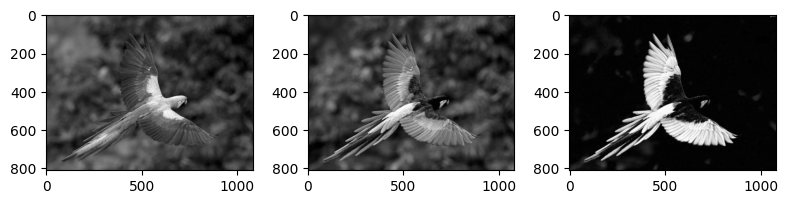

In [10]:
 

plt.figure(figsize=(8,3))

plt.subplot(1,3,1)
plt.imshow(R,cmap="gray")


plt.subplot(1,3,2)
plt.imshow(G,cmap="gray")

plt.subplot(1,3,3)
plt.imshow(B,cmap="gray")

plt.tight_layout() # a handy command that increases spacing between subplots

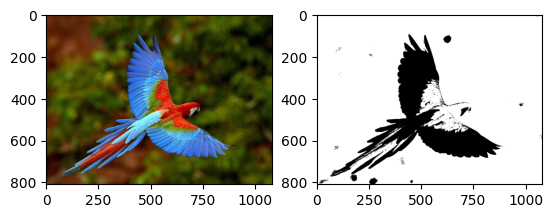

In [11]:
#mask = np.multiply((R < 80),(B>100))
mask = B<40
plt.subplot(1,2,1)
plt.imshow(astro)

plt.subplot(1,2,2)
plt.imshow(mask, cmap='gray');

Quali sono le relazioni tra campi diversi? come osservarle?

Text(0, 0.5, 'G')

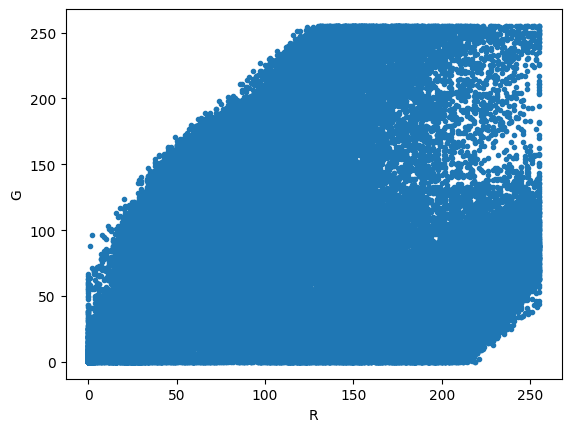

In [12]:
# ogni punto rappresenta la coppia (R,G) dei pixel dell'immagine
plt.plot(R.ravel(),G.ravel(),'.')
plt.xlabel('R')
plt.ylabel('G')


La funzione qui di seguito (per immagini a intensità luminosa) ci permette di visualizzare immagine, istogramma, cumulativa  

In [13]:
def plot_img_and_hist(img, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram."""
    #img = img_as_float(img) ##Convert our input greyscale image to float 
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(img, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(img.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 255)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(img, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])
   
    return ax_img, ax_hist, ax_cdf



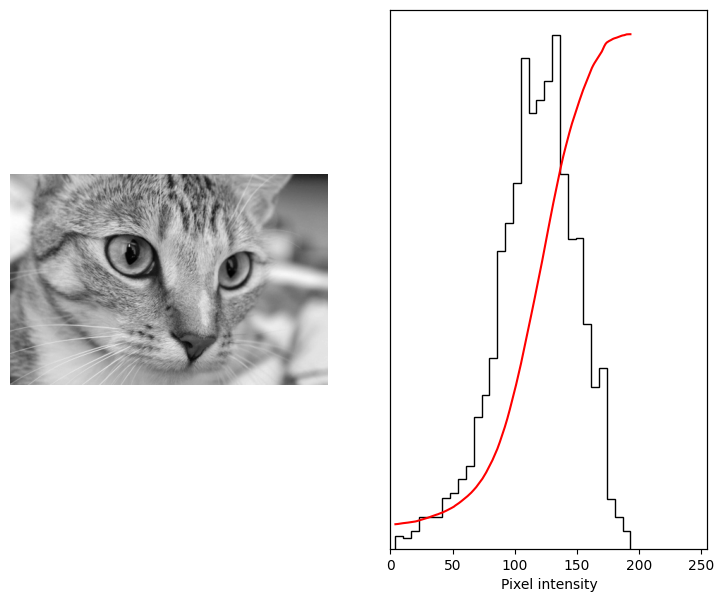

In [14]:
# Test the function plot_img_and_hist using a sample image
img = data.chelsea()
img = img_as_ubyte(color.rgb2gray(img))

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(7)
fig.set_figwidth(9)
ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes,30) 


### Contrast stretching  


In [15]:
def my_contrast_stretch(img):
    M=np.max(img)
    m=np.min(img)
    return np.multiply(np.divide((img-m),(M-m)),255).astype(np.uint8)

Confronto con la funzione skimage (più generica)

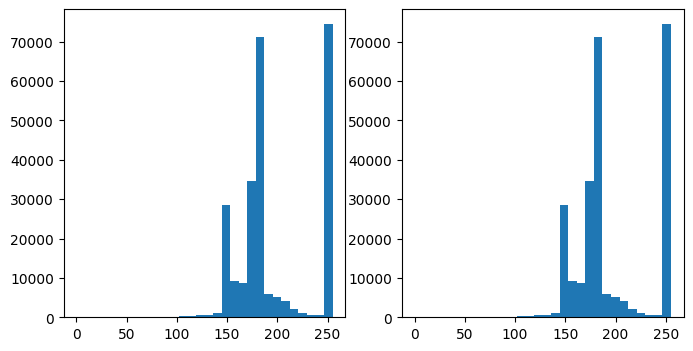

In [16]:

# un'immagine a contrasto basso ma dove il range dei valori possibili e' quasi completamente usato
rgb_img = data.logo() 
img = img_as_ubyte(color.rgb2gray(rgb_img[:,:,0:3]))

# un'immagine con un buon contrasto
#rgb_img = io.imread('images/lionfish.jpg')#data.astronaut() 
#img = img_as_ubyte(color.rgb2gray(rgb_img))

my_img_rescale = my_contrast_stretch(img);


fig = plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
plt.hist((img).ravel(), bins=30); # color='black' , histtype='step' );
plt.subplot(1,2,2)
plt.hist((my_img_rescale).ravel(), bins=30); # color='black' , histtype='step' );

Nella versione di `skimage` possiamo controllare il range di input che vogliamo espandere. Qui usiamo i percentili e questo puo' essere comodo soprattutto quando il range dei valori dell'immagine di input è molto ampio  

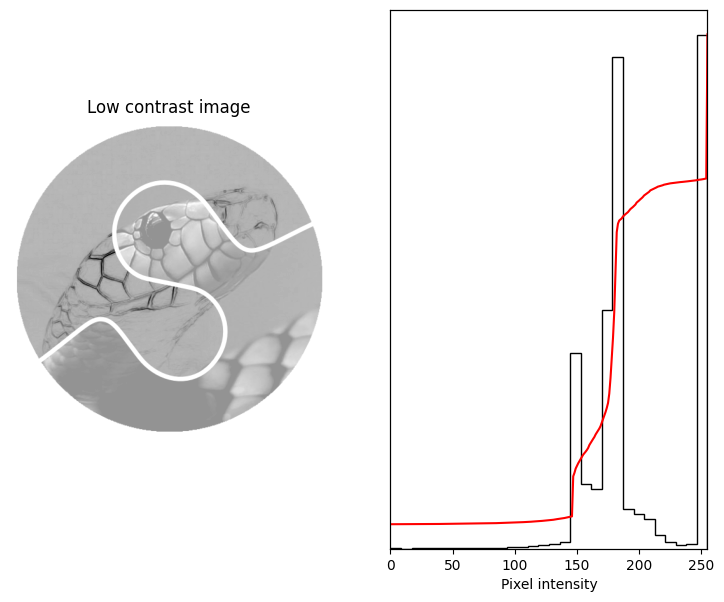

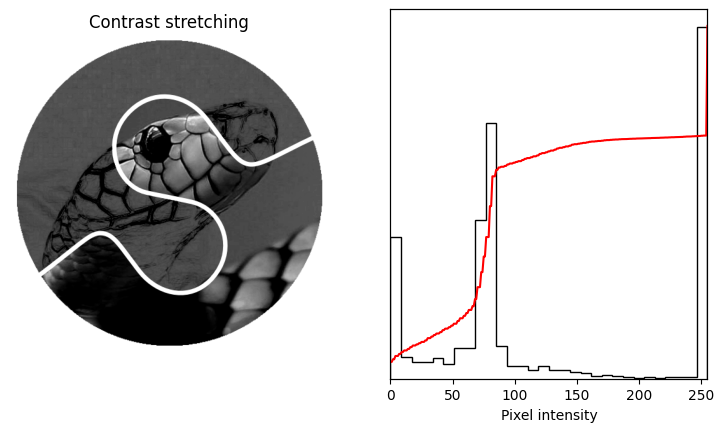

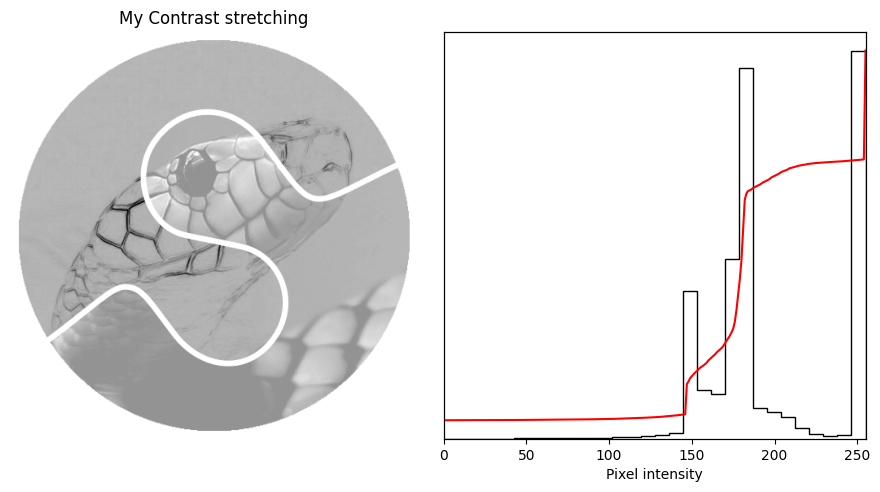

In [17]:
# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))
my_img_rescale = my_contrast_stretch(img);

# Display results

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(7)
fig.set_figwidth(9)
ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes,30) 
ax_img.set_title('Low contrast image')

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(9)
ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes,30)
ax_img.set_title('Contrast stretching')

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(9)
ax_img, ax_hist, ax_cdf = plot_img_and_hist(my_img_rescale, axes,30)
ax_img.set_title('My Contrast stretching')

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

## Wrap up
- cosa è un istogramma di un'immagine ad intensità luminosa o a colori
- cosa cambia se cambio il numero di bin e se normalizzo o non normalizzo l'istogramma?
- cosa e' il "contrast stretch"? come si calcola?
- perche' la nostra funzione di stretch del contrasto funziona in modo diverso (e nell'esempio meno bene) di quella di libreria? 